In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-n-cats/dog3.jpg
/kaggle/input/dogs-n-cats/dog2.jpg
/kaggle/input/dogs-n-cats/cat1.jpg
/kaggle/input/dogs-n-cats/cat2.jpg
/kaggle/input/dogs-n-cats/dog5.jpg
/kaggle/input/dogs-n-cats/cat5.jpg
/kaggle/input/dogs-n-cats/dog4.jpg
/kaggle/input/dogs-n-cats/cat4.jpg
/kaggle/input/dogs-n-cats/cat3.jpg
/kaggle/input/dogs-n-cats/dog1.jpg


In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-10-23 17:20:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  81.2MB/s    in 0.8s    

2023-10-23 17:20:48 (81.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import zipfile
local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os
base_dir = "/kaggle/working/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
train_dir_dogs = os.path.join(train_dir, "dogs")
train_dir_cats = os.path.join(train_dir,"cats")
validation_dir = os.path.join(base_dir, "validation")
validation_dir_dogs = os.path.join(validation_dir, "dogs")
validation_dir_cats = os.path.join(validation_dir, "cats")

In [5]:
dogs = [os.path.join(train_dir_dogs,i) for i in os.listdir(train_dir_dogs)[:10]]
cats = [os.path.join(train_dir_cats,i) for i in os.listdir(train_dir_cats)[:10]]

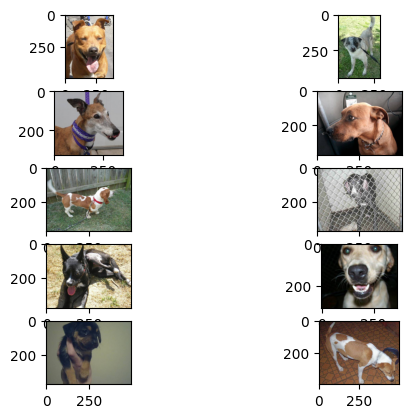

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
i = 1
for image in dogs:
    sp = plt.subplot(5,2,i)
    i+=1
    plt.imshow(mpimg.imread(image))

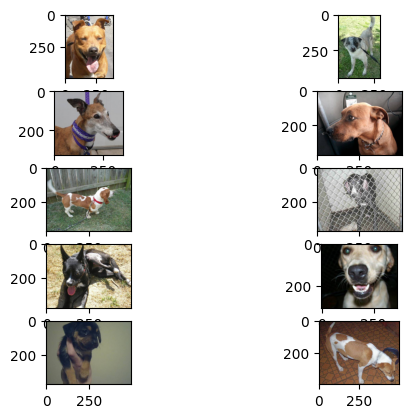

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
i = 1
for image in dogs:
    sp = plt.subplot(5,2,i)
    i+=1
    plt.imshow(mpimg.imread(image))

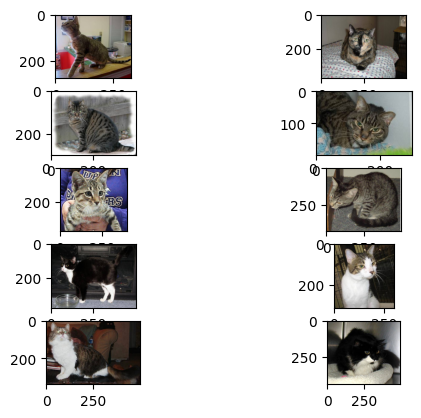

In [8]:
i = 1
for image in cats:
    plt.subplot(5,2,i)
    i+=1
    plt.imshow(mpimg.imread(image))

In [9]:
import tensorflow as tf
import tensorflow.keras as keras

model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3), activation =tf.nn.relu, input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32, (3,3), activation= "relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [10]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode="binary",
                                                   target_size=(150,150))
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                 batch_size=20,
                                                 class_mode="binary",
                                                 target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
100/100 [==============================] - 40s 387ms/step - loss: 0.7831 - accuracy: 0.5645 - val_loss: 0.6457 - val_accuracy: 0.6510
Epoch 2/15
100/100 [==============================] - 39s 389ms/step - loss: 0.6221 - accuracy: 0.6570 - val_loss: 0.6004 - val_accuracy: 0.6530
Epoch 3/15
100/100 [==============================] - 39s 386ms/step - loss: 0.5756 - accuracy: 0.6980 - val_loss: 0.5790 - val_accuracy: 0.6940
Epoch 4/15
100/100 [==============================] - 39s 391ms/step - loss: 0.5212 - accuracy: 0.7410 - val_loss: 0.5736 - val_accuracy: 0.7020
Epoch 5/15
100/100 [==============================] - 39s 385ms/step - loss: 0.4565 - accuracy: 0.7960 - val_loss: 0.5559 - val_accuracy: 0.7360
Epoch 6/15
100/100 [==============================] - 39s 386ms/step - loss: 0.4036 - accuracy: 0.8055 - val_loss: 0.6727 - val_accuracy: 0.6760
Epoch 7/15
100/100 [==============================] - 39s 390ms/step - loss: 0.3510 - accuracy: 0.8480 - val_loss: 0.5894 - val_ac

In [13]:
from tensorflow.keras.utils import load_img, img_to_array
test_images = ["/kaggle/input/dogs-n-cats/"+i for i in os.listdir("/kaggle/input/dogs-n-cats")]
for file_name in test_images:
    img = load_img(file_name, target_size=(150,150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10, verbose=3)
    if classes[0] > 0.5:
        print(file_name," is a dog ", classes[0])
    else:
        print(file_name," is a cat ", classes[0])

/kaggle/input/dogs-n-cats/dog3.jpg  is a dog  [1.]
/kaggle/input/dogs-n-cats/dog2.jpg  is a dog  [1.]
/kaggle/input/dogs-n-cats/cat1.jpg  is a cat  [0.0004601]
/kaggle/input/dogs-n-cats/cat2.jpg  is a cat  [0.01292592]
/kaggle/input/dogs-n-cats/dog5.jpg  is a dog  [0.99986714]
/kaggle/input/dogs-n-cats/cat5.jpg  is a cat  [9.084909e-09]
/kaggle/input/dogs-n-cats/dog4.jpg  is a dog  [0.9999971]
/kaggle/input/dogs-n-cats/cat4.jpg  is a cat  [1.7277794e-07]
/kaggle/input/dogs-n-cats/cat3.jpg  is a cat  [3.9167495e-13]
/kaggle/input/dogs-n-cats/dog1.jpg  is a cat  [0.0215443]
